In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [59]:
#read csv file
data=pd.read_csv('gold_dataset.csv.csv') 
print(data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [60]:
data.head()     #first 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [61]:
data.tail()   #last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [62]:
data.info()  # information about column, column labels, the data types etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [63]:
data.isnull().sum() #it gives number of missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [64]:
data.describe() #gives the basic statistics of the dataset

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [65]:
#Correlation between the data 
#it can be POSITIVE OR NEGATIVE CORRELATION
correlation=data.corr()

In [66]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

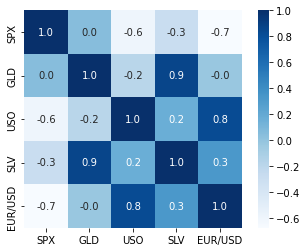

In [67]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues') #it gives different shades of the same color for the value to be correlated

In [68]:
print(correlation['GLD']) #we can compare about the positive or negative correlated values

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

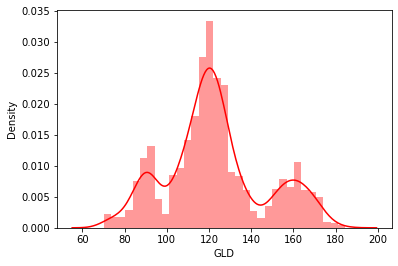

In [69]:
sns.distplot(data['GLD'],color='Red') #it plots the graph

In [70]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [71]:
print(X,Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [72]:
#Train Test Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) #random state will do the shuffeling and testsize tells about the size of splitting of data in percentage

In [73]:
#REGRESSION MODEL
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [74]:
#PREDTICTING THE TEST DATA
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.1039992   82.14189977 116.11299983 127.63740108 120.73240134
 154.78949763 150.17579921 126.32249992 117.41889891 126.01010099
 116.65060089 171.75610123 141.44859944 167.9378985  115.16960013
 117.52790072 138.33220353 169.83250109 159.7525034  161.84419944
 155.11659996 125.17119991 176.32459922 157.40290316 125.19300042
  93.73969944  77.32740017 120.81980002 119.00279872 167.4769998
  88.02570022 125.20479965  91.18090058 117.75129978 121.18769958
 136.00790088 115.51500082 115.37740066 147.35909958 107.24250104
 104.3720023   87.10669775 126.62970067 118.10860044 154.18329894
 119.64290002 108.27800018 108.08999824  93.16450036 127.04719814
  74.80090055 113.67519886 121.2467002  111.19719904 118.89989919
 121.03949929 159.26950173 167.72760148 147.20229689  85.79879892
  94.41730036  86.73469875  90.48420029 118.98910071 126.4315006
 127.47450031 170.49460032 122.2914991  117.22219884  98.27499998
 168.59100177 143.2552984  131.7816026  121.09020218 121.26449927
 119.7170003

In [75]:
#R squared error
error=metrics.r2_score(Y_test,test_data_prediction)
print('r2 error:',error)

r2 error: 0.9895162827785834


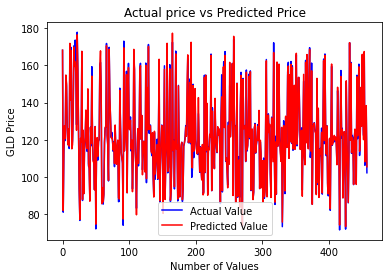

In [76]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [77]:
#We can conclude that the predicted values are approximatelty same as the actual value so this model is 